# Risk Parity Portfolio Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [3]:
# Date range
start = '2021-01-01'
end = '2024-10-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [5]:
# Calculating returns
Y = data[assets].pct_change().dropna()
Y.tail(5)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-23 00:00:00+00:00,-2.7403%,-1.7638%,-0.3280%,0.5686%,0.0000%,-0.1343%,-0.8446%,0.4894%,-1.0489%,-0.2088%,...,1.5531%,-0.9447%,1.4481%,0.6931%,4.6047%,-0.7641%,-1.6866%,-0.7767%,3.2771%,-1.1807%
2024-10-24 00:00:00+00:00,0.7350%,-1.1843%,0.7129%,-0.2639%,0.2407%,-0.9076%,0.0639%,0.5947%,1.7294%,0.4969%,...,-0.1416%,1.0019%,-0.4003%,-0.0275%,-1.2895%,1.4387%,-3.3149%,-6.1932%,-2.3332%,0.5589%
2024-10-25 00:00:00+00:00,0.6080%,-0.1224%,-2.0691%,-1.8896%,0.0240%,-0.5767%,0.1702%,-0.7639%,1.1242%,-0.1561%,...,-1.2479%,1.0111%,-0.6117%,-0.7161%,-1.6667%,0.6526%,-0.5382%,1.0553%,-1.1467%,-1.6098%
2024-10-28 00:00:00+00:00,-4.5125%,-2.7869%,0.1112%,1.3868%,0.4321%,1.5012%,1.1897%,1.0835%,1.4642%,1.2901%,...,0.9190%,1.1048%,0.0803%,1.6921%,1.2826%,-1.2305%,-0.3319%,1.1172%,0.5800%,2.2789%
2024-10-29 00:00:00+00:00,-1.6456%,1.5197%,-0.0555%,-0.2660%,0.5497%,-1.0756%,-1.8266%,-1.5303%,-0.9620%,-0.8491%,...,-2.0489%,-0.3736%,-1.5894%,-2.4277%,0.3166%,-0.9176%,-0.8633%,-1.8014%,-0.6968%,-0.7237%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [8]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
w.T

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,1.6682%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,13.8041%,17.2237%,4.8590%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


### 2.2 Plotting portfolio composition

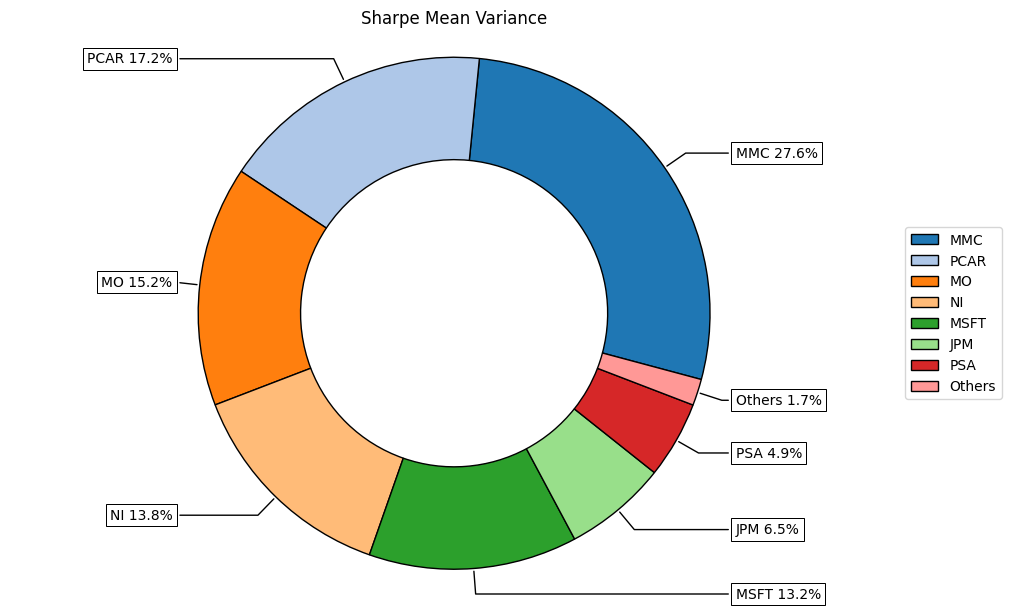

In [11]:
# Plotting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Plotting Risk Composition

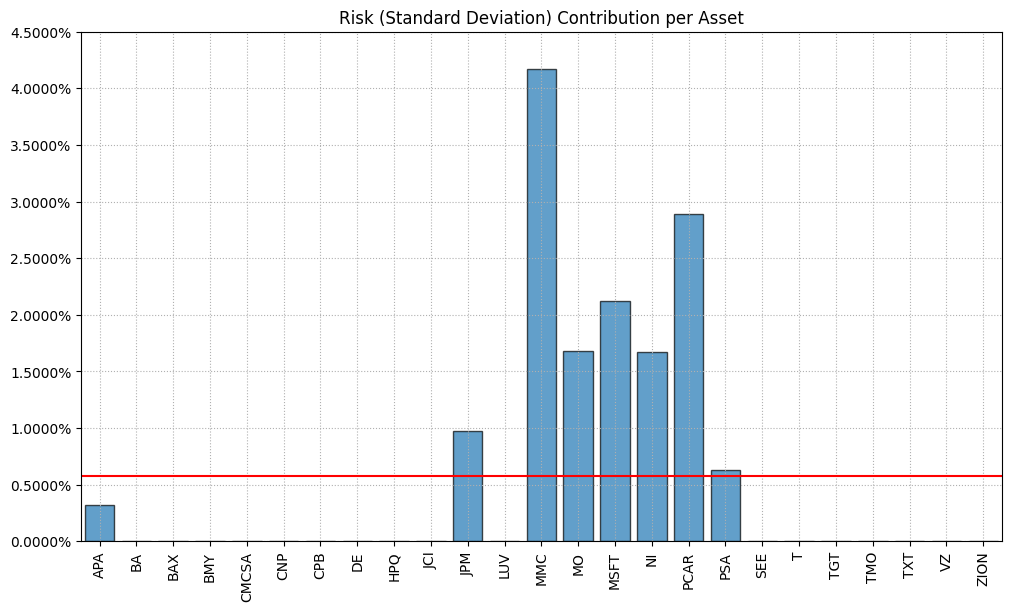

In [14]:
# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios for Other Risk Measures

In this part I will calculate risk parity portfolios. First I'm going to calculate risk parity portfolio when we use variance as risk measure, then I'm going to calculate the risk parity portfolios for all available risk measures.

### 3.1 Calculating the risk parity portfolio for variance.

In [17]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
w.T

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,1.6682%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,13.8041%,17.2237%,4.8590%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


### 3.2 Plotting portfolio composition

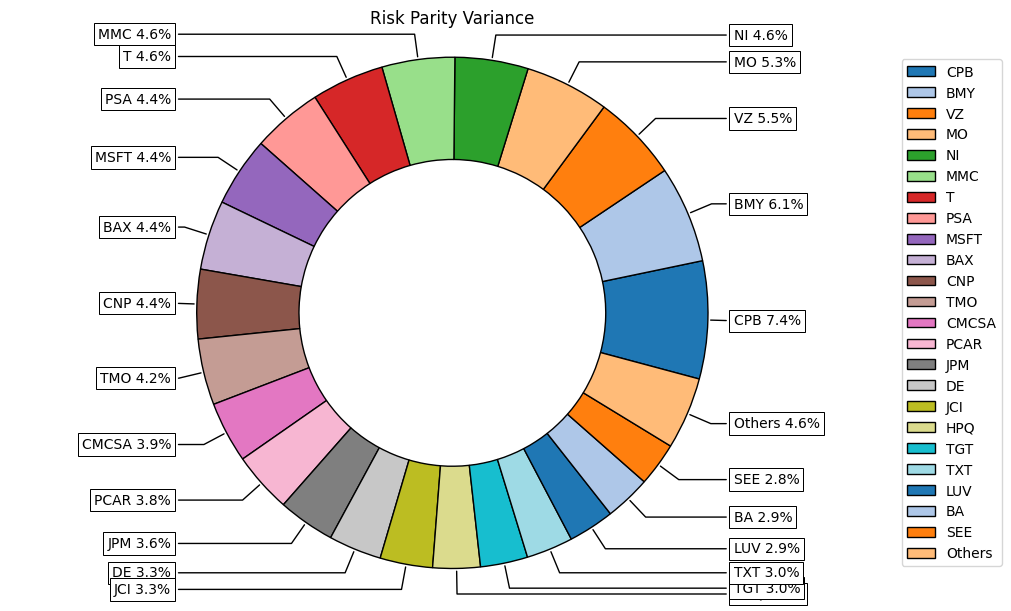

In [20]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3  Plotting Risk Composition

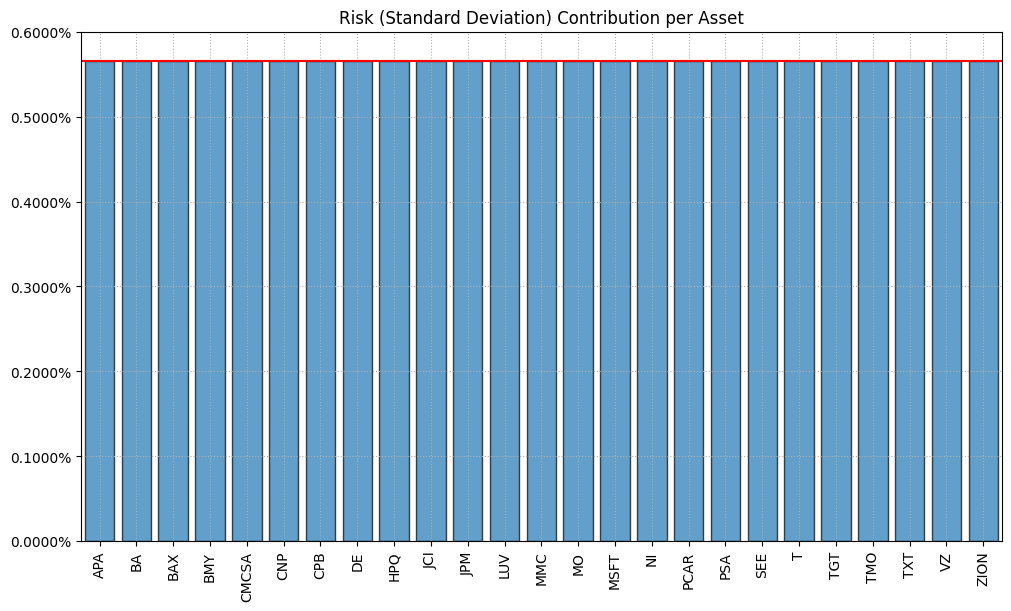

In [23]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [26]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.solvers = ['MOSEK']
#port.sol_params = {'MOSEK': {'tol': 1e-8}}  # Adjust tolerance if needed

for i in rms:
    port = rp.Portfolio(returns=Y)
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.
    port.assets_stats(method_mu=method_mu, method_cov=method_cov)

    w = port.rp_optimization(model=model, rm=i, rf=rf, b=b, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    print(i)
    
w_s.columns = rms

MV
MAD
MSV
FLPM
SLPM
CVaR
EVaR
CDaR
UCI
EDaR


In [28]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,CDaR,UCI,EDaR
APA,2.48%,2.28%,2.45%,2.27%,2.49%,2.70%,2.74%,6.17%,4.89%,4.93%
BA,2.90%,3.01%,2.92%,2.76%,2.81%,2.79%,2.38%,1.69%,2.10%,1.68%
BAX,4.39%,4.39%,4.43%,3.86%,4.12%,3.93%,4.59%,1.41%,1.45%,1.46%
BMY,6.13%,5.98%,6.12%,5.80%,6.00%,6.04%,6.98%,4.68%,3.98%,5.09%
CMCSA,3.86%,3.66%,3.89%,3.54%,3.79%,4.11%,3.63%,1.85%,2.12%,1.59%
CNP,4.38%,4.63%,4.29%,4.61%,4.32%,4.06%,4.57%,3.11%,4.65%,3.89%
CPB,7.44%,7.31%,7.45%,7.24%,7.42%,7.44%,5.27%,21.63%,17.00%,24.20%
DE,3.35%,3.22%,3.37%,3.21%,3.41%,3.85%,3.79%,1.70%,1.99%,2.01%
HPQ,3.00%,2.88%,3.11%,2.86%,3.15%,3.46%,2.99%,1.51%,1.81%,1.46%
JCI,3.32%,3.32%,3.33%,3.36%,3.38%,3.52%,3.82%,1.46%,1.93%,1.71%


<Axes: >

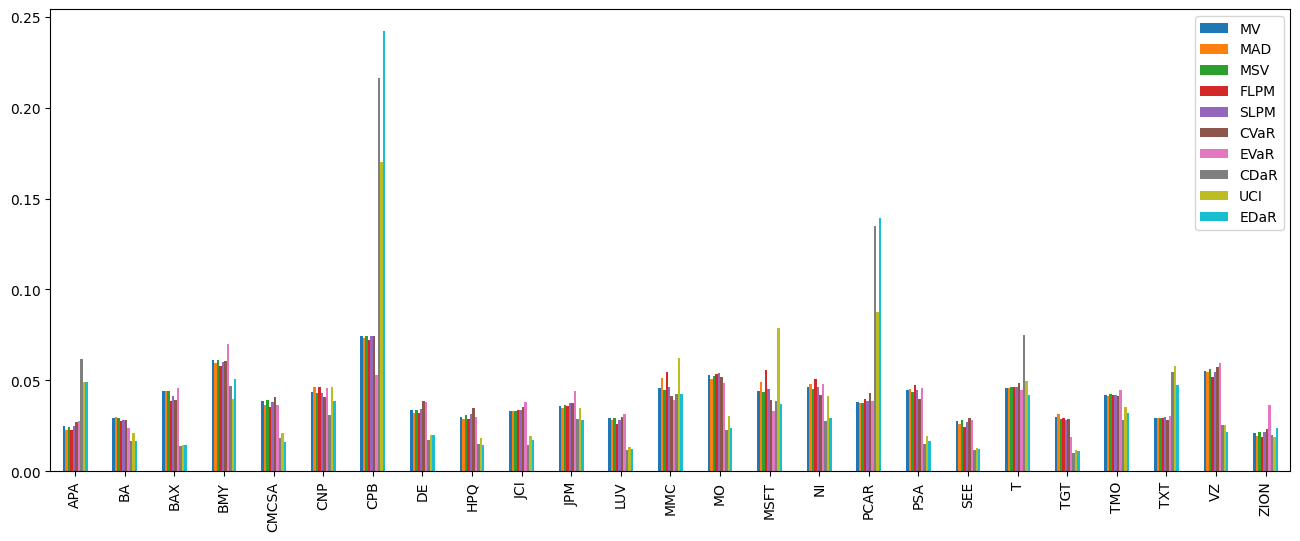

In [30]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(16)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)